In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from IPython.display import display
#pd.options.display.max_columns = None
pd.set_option('display.expand_frame_repr', False)
from __future__ import print_function
pd.options.display.max_colwidth = 999
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

#pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import sklearn.datasets
import sklearn.cross_validation as cv
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
dt = pd.read_csv('data_one-hot-encoded&cleaned_v1.0_Sep25.csv', encoding = "ISO-8859-1")
print(dt.shape)
dt.head(3)

(4525, 209)


,Unnamed: 0,index,popularity_numeric,popular,prod_name,brand,price_dis,price_reg,price_range,discount,category,sub_category,show_3,shape,length,main_material,main_gem,gold_quality,diamonds_ct,width,diameter,pendant_gems_size,currcolor_black,currcolor_blue,currcolor_brown,currcolor_clear,currcolor_gold,currcolor_green,currcolor_grey,currcolor_multi,currcolor_orange,currcolor_pink,currcolor_purple,currcolor_red,currcolor_rose,currcolor_silver,currcolor_silver.,currcolor_white,currcolor_yellow,category_anklet,category_bracelets,category_cufflink,category_earrings,category_necklaces,category_pin,category_rings,sub_category_anklet,sub_category_band,sub_category_bangle & cuff,sub_category_beaded,sub_category_chain,sub_category_charm,sub_category_choker,sub_category_climber & cuff,sub_category_clip on,sub_category_cocktail & statement,sub_category_drop & chandelier,sub_category_hoop,sub_category_jacket,sub_category_lariat,sub_category_link,sub_category_pendant,sub_category_stackables & sets,sub_category_stud,sub_category_tennis,sub_category_unknown,sub_category_wrap,shape_baguette,shape_bib,shape_box,shape_button,shape_chandelier,shape_channel,shape_choker,shape_collar,shape_colored,shape_conch,shape_curve,shape_cushion,shape_drop,shape_emerald,shape_flag,shape_floral,shape_heart,shape_helix,shape_layer,shape_layered,shape_lobe,shape_marquise,shape_miracle,shape_moon,shape_nautical,shape_omega,shape_oval,shape_pave,shape_pear,shape_princess,shape_prong,shape_rectangular,shape_rope,...,shape_teardrop,shape_thread,shape_trillion,shape_unknown,shape_wrap,main_material_beads,main_material_fabric,main_material_leather,main_material_metal,main_material_plastic,main_material_rose gold,main_material_silver,main_material_stainless steel,main_material_white gold,main_material_yellow gold,main_gem_agate,main_gem_amethyst,main_gem_crystal,main_gem_cubic zirconia,main_gem_diamond,main_gem_glass,main_gem_labradorite,main_gem_lapis,main_gem_moonstone,main_gem_mother-of-pearl,main_gem_onyx,main_gem_opal,main_gem_pearl,main_gem_pyrite,main_gem_turquoise,brand_ADORE,brand_ALOR,brand_AQUA,brand_Adina Reyter,brand_Alex Woo,brand_Alex and Ani,brand_Alexandra Koumba,brand_Alexis Bittar,brand_Area Stars,brand_Argento Vivo,brand_Atelier Swarovski,brand_BAUBLEBAR,brand_Bing Bang NYC,brand_Bloomingdale's,brand_Carolee,brand_Carolee Lux,brand_Chan Luu,brand_Crislu,brand_Dana Kellin,brand_Dana Rebecca Designs,brand_Dannijo,brand_Dodo,brand_Dogeared,brand_Ela Rae,brand_For Love & Lemons,brand_Freida Rothman,brand_Gorjana,brand_ICONERY,brand_Jane Basch,brand_Jennifer Zeuner,brand_Jet Set Candy,brand_Jules Smith,brand_KC Designs,brand_Kendra Scott,brand_Lauren Ralph Lauren,brand_Les Georgettes,brand_Links of London,brand_Lulu DK,brand_MATEO,brand_Majorica,brand_Marchesa,brand_Margaret Elizabeth,brand_Melissa Lovy,brand_Michael Kors,brand_Moon & Meadow,brand_Nadri,brand_Officina Bernardi,brand_Olivia Burton,brand_Oscar de la Renta,brand_PANDORA,brand_Phyllis and Rosie,brand_RJ Graziano,brand_Ralph Lauren,brand_Rebecca Minkoff,brand_Robert Lee Morris Soho,brand_Roberto Demeglio,brand_Rosefield,brand_Shinola,brand_Sorrelli,brand_Stephanie Kantis,brand_Swarovski,brand_TOUS,brand_Tory Burch,brand_Trina Turk,brand_Uno de 50,brand_Volu,brand_Weekend Max Mara,brand_ZoA Chicco,brand_kate spade new york,dis_rate
0,0,0,2543,0,"""moon"" bead tricolor medium hoop earrings",Officina Bernardi,120.000000,120.000000,3,0,earrings,hoop,1,"['set', 'moon']",2.250000,beads,unknown,18.000000,0.000000,nan,2.250000,nan,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1,1,1,4342,0,"""moon"" oval bead medium hoop earrings",Officina Bernardi,130.000000,130.000000,3,0,earrings,hoo

In [13]:
dt['popularity_numeric2'] = 4525 - dt.popularity_numeric

In [14]:
dt.drop('Unnamed: 0', 1, inplace=True)

In [15]:
dt.length.loc[(dt.length.isna() == True) & (dt.category == 'rings')] = np.mean(dt.length.loc[(dt.category == 'rings')])

In [16]:
dt.isna().any()

index                                False
popularity_numeric                   False
popular                              False
prod_name                            False
brand                                False
price_dis                            False
price_reg                            False
price_range                          False
discount                             False
category                             False
sub_category                         False
show_3                               False
shape                                False
length                               False
main_material                        False
main_gem                             False
gold_quality                         False
diamonds_ct                          False
width                                 True
diameter                              True
pendant_gems_size                     True
currcolor_black                      False
currcolor_blue                       False
currcolor_b

In [17]:
y = dt.popularity_numeric2
#y = dt[dt.category =='earrings'].popularity_numeric2

In [25]:
X = dt.drop(['index', 'popularity_numeric', 'popularity_numeric2', 'popular', 'prod_name', 'brand', 'category', 'sub_category', 'show_3', 'shape', \
            'main_material', 'main_gem', 'width', 'diameter', 'pendant_gems_size'], 1)
#X = dt[dt.category =='earrings'].drop(['index', 'popularity_numeric', 'popularity_numeric2', 'popular', 'prod_name', 'brand', 'category', 'sub_category', 'show_3', 'shape', \
           # 'main_material', 'main_gem', 'width', 'diameter', 'pendant_gems_size'], 1)

In [19]:
X.shape

(4525, 194)

In [20]:
X.isna().any()

price_dis                            False
price_reg                            False
price_range                          False
discount                             False
length                               False
gold_quality                         False
diamonds_ct                          False
currcolor_black                      False
currcolor_blue                       False
currcolor_brown                      False
currcolor_clear                      False
currcolor_gold                       False
currcolor_green                      False
currcolor_grey                       False
currcolor_multi                      False
currcolor_orange                     False
currcolor_pink                       False
currcolor_purple                     False
currcolor_red                        False
currcolor_rose                       False
currcolor_silver                     False
currcolor_silver.                    False
currcolor_white                      False
currcolor_y

### 1. modeling popularity numeric (Regression with order info)
* Using Lasso - feature selection too

In [21]:
# standardize
from sklearn import preprocessing

temp = pd.DataFrame(preprocessing.scale(X))
temp.columns = X.columns
temp.head()

,price_dis,price_reg,price_range,discount,length,gold_quality,diamonds_ct,currcolor_black,currcolor_blue,currcolor_brown,currcolor_clear,currcolor_gold,currcolor_green,currcolor_grey,currcolor_multi,currcolor_orange,currcolor_pink,currcolor_purple,currcolor_red,currcolor_rose,currcolor_silver,currcolor_silver.,currcolor_white,currcolor_yellow,category_anklet,category_bracelets,category_cufflink,category_earrings,category_necklaces,category_pin,category_rings,sub_category_anklet,sub_category_band,sub_category_bangle & cuff,sub_category_beaded,sub_category_chain,sub_category_charm,sub_category_choker,sub_category_climber & cuff,sub_category_clip on,sub_category_cocktail & statement,sub_category_drop & chandelier,sub_category_hoop,sub_category_jacket,sub_category_lariat,sub_category_link,sub_category_pendant,sub_category_stackables & sets,sub_category_stud,sub_category_tennis,sub_category_unknown,sub_category_wrap,shape_baguette,shape_bib,shape_box,shape_button,shape_chandelier,shape_channel,shape_choker,shape_collar,shape_colored,shape_conch,shape_curve,shape_cushion,shape_drop,shape_emerald,shape_flag,shape_floral,shape_heart,shape_helix,shape_layer,shape_layered,shape_lobe,shape_marquise,shape_miracle,shape_moon,shape_nautical,shape_omega,shape_oval,shape_pave,shape_pear,shape_princess,shape_prong,shape_rectangular,shape_rope,shape_round,shape_set,shape_snake,shape_sports,shape_square,shape_star,shape_strand,shape_stretch,shape_sun,shape_teardrop,shape_thread,shape_trillion,shape_unknown,shape_wrap,main_material_beads,main_material_fabric,main_material_leather,main_material_metal,main_material_plastic,main_material_rose gold,main_material_silver,main_material_stainless steel,main_material_white gold,main_material_yellow gold,main_gem_agate,main_gem_amethyst,main_gem_crystal,main_gem_cubic zirconia,main_gem_diamond,main_gem_glass,main_gem_labradorite,main_gem_lapis,main_gem_moonstone,main_gem_mother-of-pearl,main_gem_onyx,main_gem_opal,main_gem_pearl,main_gem_pyrite,main_gem_turquoise,brand_ADORE,brand_ALOR,brand_AQUA,brand_Adina Reyter,brand_Alex Woo,brand_Alex and Ani,brand_Alexandra Koumba,brand_Alexis Bittar,brand_Area Stars,brand_Argento Vivo,brand_Atelier Swarovski,brand_BAUBLEBAR,brand_Bing Bang NYC,brand_Bloomingdale's,brand_Carolee,brand_Carolee Lux,brand_Chan Luu,brand_Crislu,brand_Dana Kellin,brand_Dana Rebecca Designs,brand_Dannijo,brand_Dodo,brand_Dogeared,brand_Ela Rae,brand_For Love & Lemons,brand_Freida Rothman,brand_Gorjana,brand_ICONERY,brand_Jane Basch,brand_Jennifer Zeuner,brand_Jet Set Candy,brand_Jules Smith,brand_KC Designs,brand_Kendra Scott,brand_Lauren Ralph Lauren,brand_Les Georgettes,brand_Links of London,brand_Lulu DK,brand_MATEO,brand_Majorica,brand_Marchesa,brand_Margaret Elizabeth,brand_Melissa Lovy,brand_Michael Kors,brand_Moon & Meadow,brand_Nadri,brand_Officina Bernardi,brand_Olivia Burton,brand_Oscar de la Renta,brand_PANDORA,brand_Phyllis and Rosie,brand_RJ Graziano,brand_Ralph Lauren,brand_Rebecca Minkoff,brand_Robert Lee Morris Soho,brand_Roberto Demeglio,brand_Rosefield,brand_Shinola,brand_Sorrelli,brand_Stephanie Kantis,brand_Swarovski,brand_TOUS,brand_Tory Burch,brand_Trina Turk,brand_Uno de 50,brand_Volu,brand_Weekend Max Mara,brand_ZoA Chicco,brand_kate spade new york,dis_rate
0,-0.142009,-0.192137,0.320212,-0.357191,-0.532242,1.416818,-0.165182,-0.215041,-0.249412,-0.154129,-0.152619,-0.935138,-0.128940,-0.132438,3.519599,-0.042084,-0.201169,-0.094438,-0.128051,-0.245894,-0.763724,-0.014868,-0.362284,-0.077477,-0.047062,-0.672445,-0.021028,1.283646,-0.572842,-0.033260,-0.252893,-0.014868,-0.151859,-0.322796,-0.162919,-0.184525,-0.418718,-0.014868,-0.102449,-0.108865,-0.209354,-0.472200,3.356020,-0.102449,-0.160762,-0.130700,-0.392482,-0.114939,-0.319446,-0.068283,-0.230348,-0.103545,-0.047062,-0.033260,-0.119777,-0.097949,-0.078907,-0.021028,-0.093240,-0.071476,-0.029745,-0.014868,-0.036438,-0.036438,-0.585091,-0.044642,-0.014868,-0.078907,-0.221706,-0.021028,-0.047062,-0.095622,-0.0

In [22]:
X = temp

In [23]:
from sklearn import linear_model

In [24]:
lassocv = linear_model.LassoCV(normalize=False, cv=10, verbose=True)
lassocvfit = lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_

................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................C:\Users

In [107]:
print("Best lambda: ", lassocvfit.alpha_)
print("R2: ", lassocvfit.score(X, y))
print("RMSE: ", np.sqrt(mean_squared_error(y, lassocvfit.predict(X))))
print("MAE: ", mean_absolute_error(y, lassocvfit.predict(X)))

Best lambda:  37.474341487472245
R2:  0.14009566668423645
RMSE:  1247.9203557426804
MAE:  1082.01899097042


In [82]:
coef = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(lassocv.coef_)], 1)
coef.columns = ['variable', 'coef']
coef['abs(coef)'] = np.abs(coef.coef)
coef.sort_values('abs(coef)', ascending=False)

,variable,coef,abs(coef)
157,brand_Kendra Scott,434.237011,434.237011
129,brand_Alex and Ani,-365.416231,365.416231
173,brand_PANDORA,266.921726,266.921726
42,sub_category_hoop,-252.382760,252.382760
163,brand_Majorica,-229.981180,229.981180
113,main_gem_diamond,-205.989146,205.989146
126,brand_AQUA,150.676927,150.676927
2,price_range,139.288270,139.288270
150,brand_Gorjana,94.971286,94.971286
30,category_rings,-94.455445,94.455445


* Linear regression result is really bad... 
(Modeling on only for earrings performed much better)

## 2. modeling popularity (Classification)

In [26]:
y = dt.popular

In [27]:
kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [28]:
def plot_roc(pred, y):
    fpr, tpr, _ = metrics.roc_curve(y, pred, )
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

### Logistic Regression

In [29]:
# Logistic reg cross validation
from sklearn.linear_model import LogisticRegressionCV

LogisticRegCV = LogisticRegressionCV(cv=kfold, random_state=7, scoring='roc_auc', solver='liblinear', penalty='l1').fit(X, y)
LogisticRegCV2 = LogisticRegressionCV(cv=kfold, random_state=7, scoring='f1', solver='liblinear', penalty='l1').fit(X, y)

print("ROC: ",  LogisticRegCV.score(X, y))
print("RMSE: ", np.sqrt(mean_squared_error(y, LogisticRegCV.predict(X))))
print("MAE: ", mean_absolute_error(y, LogisticRegCV.predict(X)))

#print("f1: ",  LogisticRegCV2.score(X, y))
#print("RMSE: ", np.sqrt(mean_squared_error(y, LogisticRegCV2.predict(X))))
#print("MAE: ", mean_absolute_error(y, LogisticRegCV2.predict(X)))
#scores = cross_val_score(modelCV, X, y, cv = 5, scoring=scoring)
#print(scores)
#print(scores.mean())
#print(scores.std())


#results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
#print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: Unde

ROC:  0.7058563535911602
RMSE:  0.5423501142332688
MAE:  0.2941436464088398


In [320]:
LogisticReg = LogisticRegression(random_state=7, penalty='l1').fit(X,y)

In [321]:
scores = cross_val_score(LogisticReg, X, y, cv = kfold, scoring=scoring)
print(scores)
print(scores.mean())
print(scores.std())

[0.6230198  0.61342975 0.65226722 0.65247107 0.67490533]
0.6432186355759321
0.022212166213278938


In [322]:
scores = cross_val_score(LogisticReg, X, y, cv = kfold, scoring=scoring)
print(scores)
print(scores.mean())
print(scores.std())

[0.6230198  0.61342975 0.65226722 0.65247107 0.67490533]
0.6432186355759321
0.022212166213278938


In [328]:
y_pred = cross_val_predict(LogisticReg, X, y, cv=kfold)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[2729  297]
 [1159  340]]


In [326]:
y_pred = LogisticRegCV.predict(X)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[2760  266]
 [1065  434]]


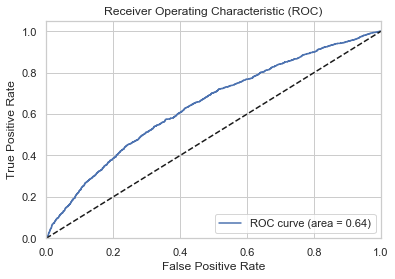

In [354]:
y_pred_log = cross_val_predict(LogisticReg, X, y, cv=kfold, method='predict_proba' )[:, 1]
plot_roc(y_pred_log, y)

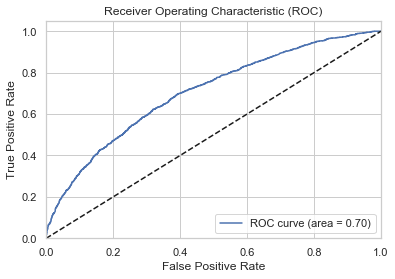

In [357]:
y_pred_logCV = LogisticRegCV.predict_proba(X)[:, 1]
plot_roc(y_pred_logCV, y)

### Decision trees

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [15]:
tree = DecisionTreeClassifier(splitter='best', max_depth=10, min_samples_leaf=5)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
feat_list = X.columns
feat_list

Index(['price_dis', 'price_reg', 'price_range', 'discount', 'length',
       'gold_quality', 'diamonds_ct', 'currcolor_black', 'currcolor_blue',
       'currcolor_brown',
       ...
       'brand_Swarovski', 'brand_TOUS', 'brand_Tory Burch', 'brand_Trina Turk',
       'brand_Uno de 50', 'brand_Volu', 'brand_Weekend Max Mara',
       'brand_ZoA Chicco', 'brand_kate spade new york', 'dis_rate'],
      dtype='object', length=194)

In [17]:
tree_imp = pd.Series(index = feat_list, data = tree.feature_importances_)

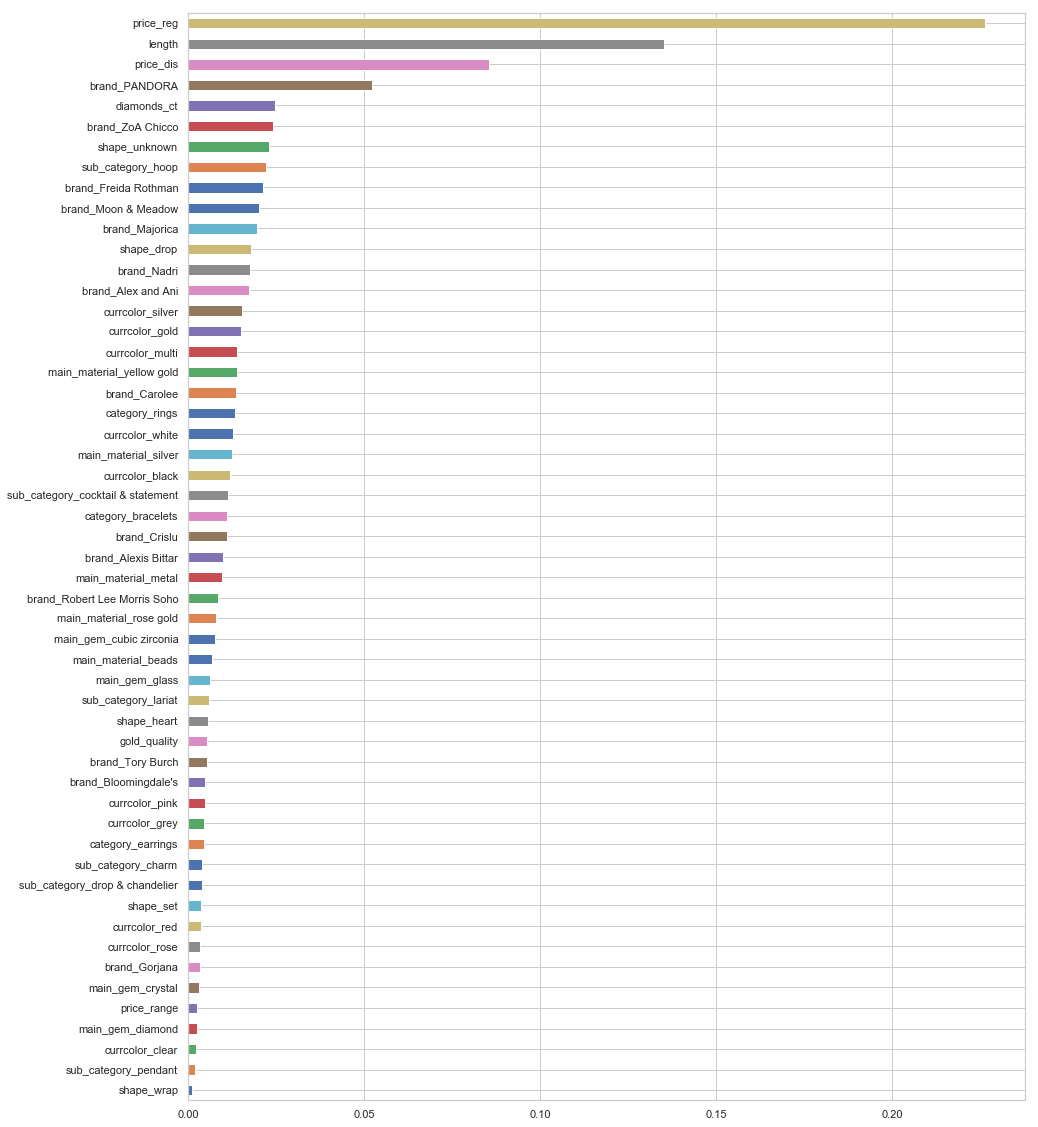

In [18]:
#A neat way to visualize your feature importance!
tree_imp = pd.Series(index = feat_list, data = tree.feature_importances_)

fig = plt.figure(figsize=(15, 20))
tree_imp[tree_imp > 0.001].sort_values().plot(kind = 'barh')

In [19]:
np.set_printoptions(suppress=False)
print("score(Mean accuracy): ", tree.score(X, y))
print("RMSE: ", np.sqrt(mean_squared_error(y, tree.predict(X))))
print("MAE: ", mean_absolute_error(y, tree.predict(X)))

# Regressor result is better than the regressions, but not really good ( and this is actually no training score)

score(Mean accuracy):  0.7427624309392266
RMSE:  0.5071859314499698
MAE:  0.2572375690607735


In [21]:
y_pred = cross_val_predict(tree, X, y, cv = kfold)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[2688  338]
 [1168  331]]


In [22]:
scores = cross_val_score(tree, X, y, cv = kfold, scoring='roc_auc')
print(scores)
print(scores.mean())
print(scores.std())

[0.58915842 0.57625344 0.61086226 0.627427   0.64629481]
0.6099991854947124
0.02527828631707574


In [23]:
scores = cross_val_score(tree, X, y, cv = kfold, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.34689507 0.28571429 0.31531532 0.28909953 0.3125    ]
0.30990484040848376
0.02201058647326712


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier().fit(X, y)

y_pred = cross_val_predict(rf, X, y, cv=kfold)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[2530  496]
 [1031  468]]


In [33]:
scores = cross_val_score(rf, X, y, cv = kfold, scoring='roc_auc')
print(scores)
print(scores.mean())
print(scores.std())

[0.61935369 0.65544077 0.62849862 0.6576281  0.65068686]
0.6423216082052109
0.015459488984470273


In [34]:
scores = cross_val_score(rf, X, y, cv = kfold, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.37959184 0.372      0.35095137 0.35463918 0.40704501]
0.37284547919686994
0.02013284581947791


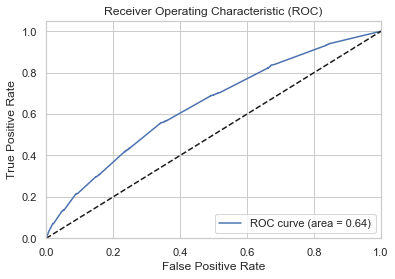

In [35]:
y_pred_rf = cross_val_predict(rf, X, y, cv=kfold, method='predict_proba' )[:, 1]
plot_roc(y_pred_rf, y)

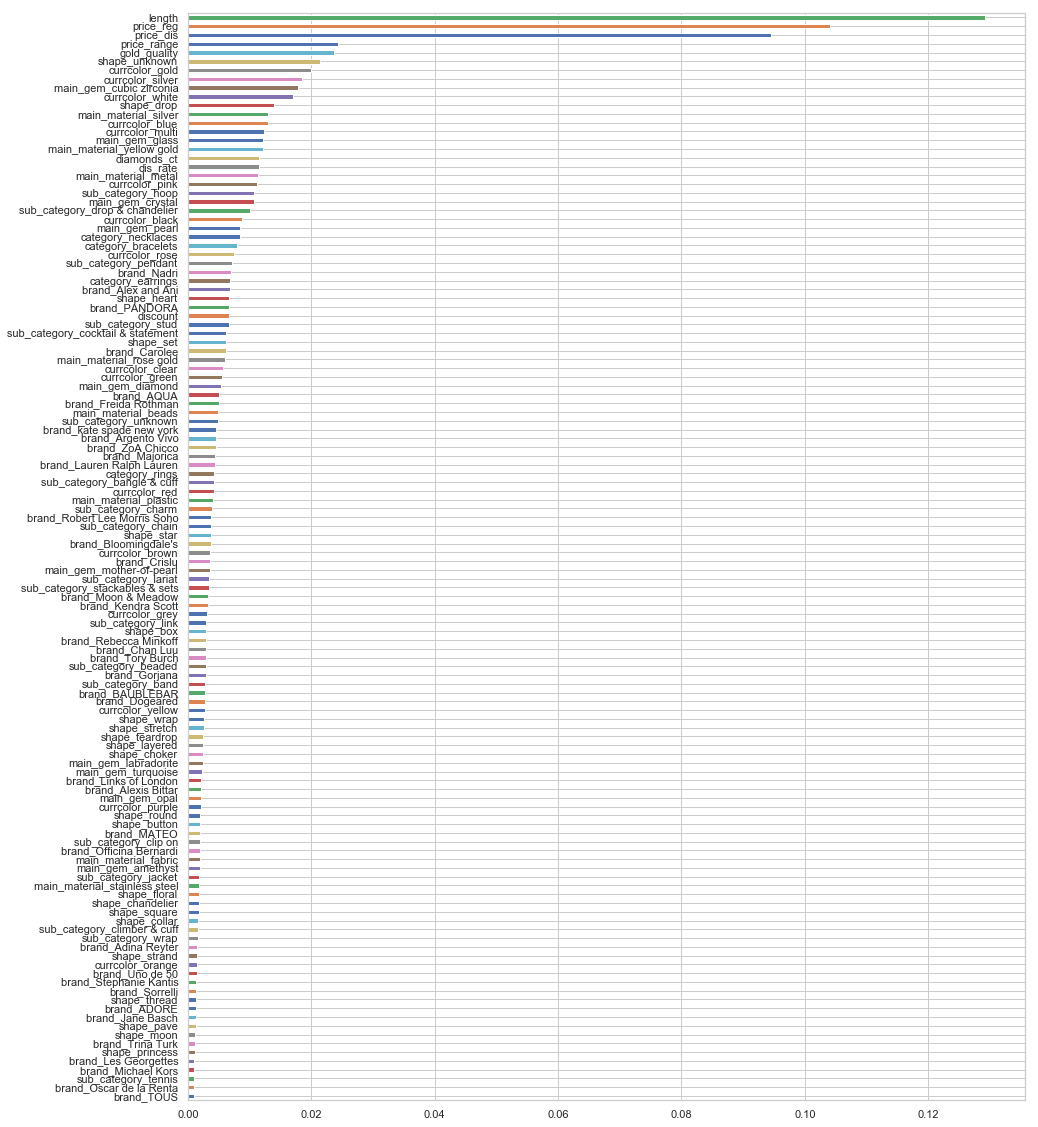

In [240]:
rf_imp = pd.Series(index = feat_list, data = rf.feature_importances_)

fig = plt.figure(figsize=(15, 20))
rf_imp[rf_imp > 0.001].sort_values().plot(kind = 'barh')

#### RandomForest GridSearchCV

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
grid_para_forest = [{
    "n_estimators": [150],
    "criterion": ["entropy"],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "max_features": ['sqrt'], 
    "random_state": [42]}]
grid_search_forest = GridSearchCV(rf, grid_para_forest, scoring='roc_auc', cv=kfold, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

Wall time: 2min 5s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [150], 'criterion': ['entropy'], 'min_samples_leaf': range(1, 10), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]), 'max_features': ['sqrt'], 'random_state': [42]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [51]:
grid_search_forest.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 150,
 'random_state': 42}

In [52]:
grid_search_forest.best_score_

0.6775290674925514

In [53]:
print("Train AUC: %.5f" % (grid_search_forest.score(X_train, y_train)))
print("Test AUC: %.5f" % (grid_search_forest.score(X_test, y_test)))

Train AUC: 0.91064
Test AUC: 0.64961


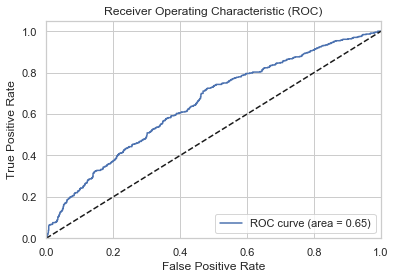

In [54]:
y_pred = grid_search_forest.predict_proba(X_test)[:, 1]
plot_roc(y_pred, y_test)

In [70]:
# Nested cross-validation

scores = cross_val_score(grid_search_forest, X, y, cv = kfold, scoring='roc_auc')
print(scores)
print(scores.mean())
print(scores.std())

[0.66511826 0.66342424 0.67440771 0.67436915 0.68976754]
0.6734173816925626
0.009358981419212554


Wall time: 0 ns


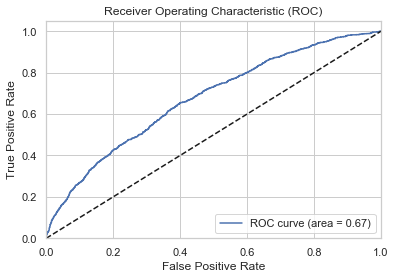

In [71]:
% time
y_pred_rf_grid = cross_val_predict(grid_search_forest, X, y, cv=kfold, method='predict_proba' )[:, 1]
plot_roc(y_pred_rf_grid, y)

### Gradient Boosting

In [64]:
gb = GradientBoostingClassifier()

y_pred = cross_val_predict(gb, X, y, cv=kfold)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[2838  188]
 [1236  263]]


In [65]:
conf_mat[0,0]

2838

In [305]:
print("Accuracy: %.5f" % ((2838+263)/conf_mat.sum()))
print("Sensitivity(recall): %.5f" % (263/conf_mat[1].sum()))
print("Precision: %.5f" % (263/(188+263)))
print("Specificity: %.5f" % (2838/(2838+1236)))

Accuracy: 0.68530
Sensitivity(recall): 0.17545
Precision: 0.58315
Specificity: 0.69661


In [66]:
scores = cross_val_score(gb, X, y, cv = kfold, scoring='roc_auc')
print(scores)
print(scores.mean())
print(scores.std())

[0.62923817 0.63446556 0.64666391 0.6493168  0.69588988]
0.6511148671358471
0.023595062484971285


In [67]:
scores = cross_val_score(gb, X, y, cv = kfold, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.2622108  0.28148148 0.24338624 0.25974026 0.31738035]
0.2728398268335976
0.02534018605900488


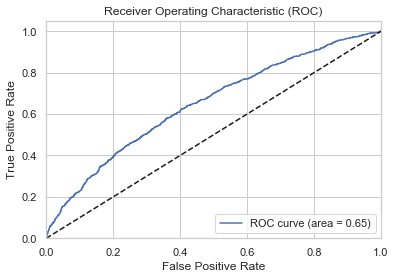

In [68]:
y_pred = cross_val_predict(gb, X, y, cv=kfold, method='predict_proba' )[:, 1]
plot_roc(y_pred, y)

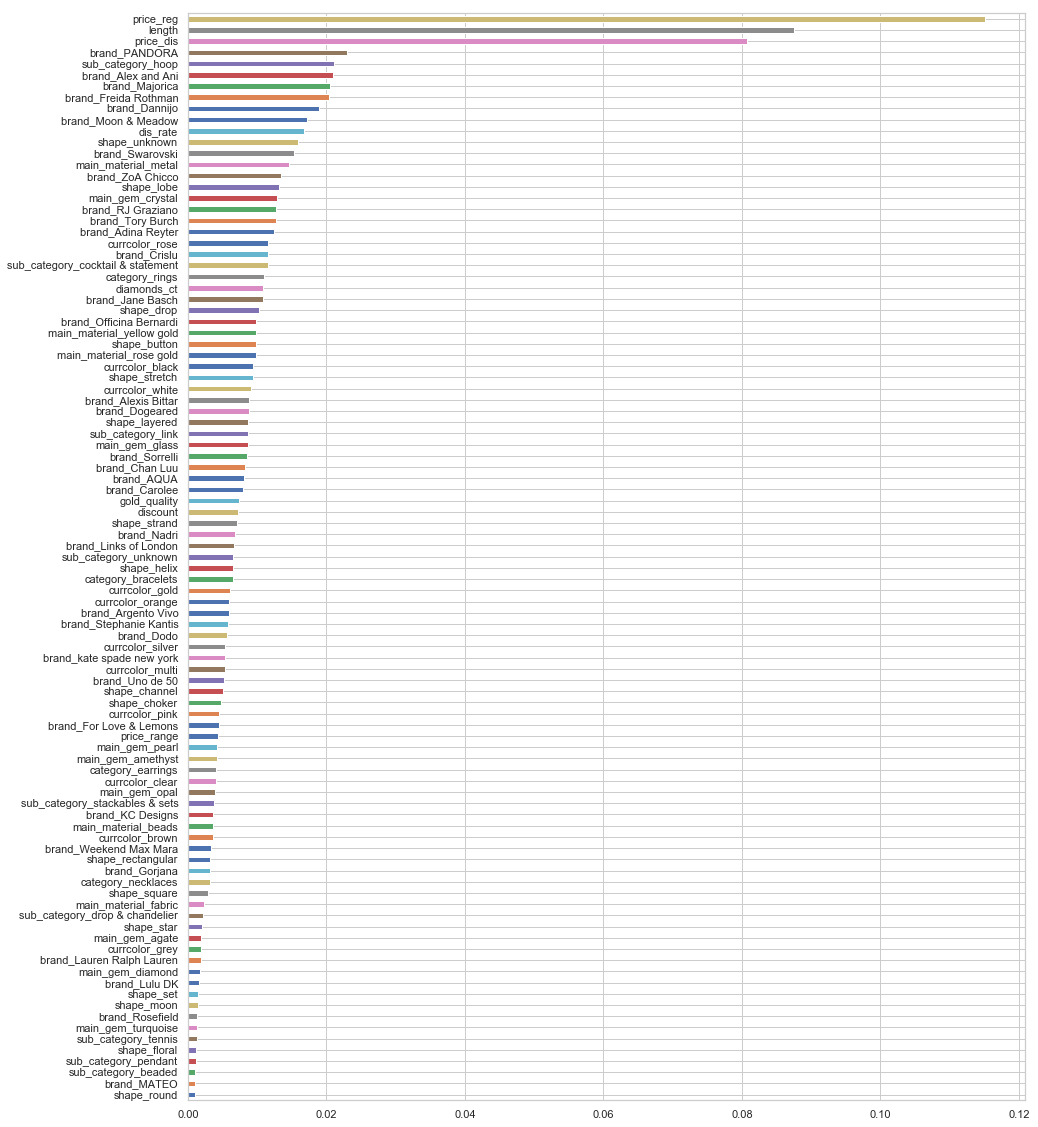

In [244]:
gb_imp = pd.Series(index = feat_list, data = gb.feature_importances_)

fig = plt.figure(figsize=(15, 20))
gb_imp[gb_imp > 0.001].sort_values().plot(kind = 'barh')

In [175]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
grid_search_gb = GridSearchCV(gb, parameters, scoring='roc_auc', cv=10, n_jobs=-1)

In [176]:
grid_search_gb.fit(X, y)
print(clf.score(X, y))
print(clf.best_params_)

NameError: name 'clf' is not defined

In [179]:
print(grid_search_gb.score(X, y))
print(grid.best_params_)

0.6063718619198435


NameError: name 'grid' is not defined

In [27]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,\
                                                               max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [28]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.60434, std: 0.02649, params: {'n_estimators': 20},
  mean: 0.60769, std: 0.02783, params: {'n_estimators': 30},
  mean: 0.60867, std: 0.02475, params: {'n_estimators': 40},
  mean: 0.61470, std: 0.02344, params: {'n_estimators': 50},
  mean: 0.61591, std: 0.02261, params: {'n_estimators': 60},
  mean: 0.61659, std: 0.02252, params: {'n_estimators': 70},
  mean: 0.61772, std: 0.02313, params: {'n_estimators': 80}],
 {'n_estimators': 80},
 0.617715966126865)

### XGBoost

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier().fit(X, y)

y_pred = cross_val_predict(xgb, X, y, cv=kfold)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

[[2840  186]
 [1238  261]]


C:\Users\Soomin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
scores = cross_val_score(xgb, X, y, cv = kfold, scoring='roc_auc')
print(scores)
print(scores.mean())
print(scores.std())

[0.63081683 0.62536088 0.65416529 0.64613223 0.68917604]
0.6491302550473959
0.022531619151573614


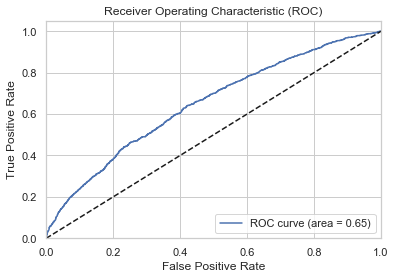

In [38]:
y_pred = cross_val_predict(xgb, X, y, cv=kfold, method='predict_proba' )[:, 1]
plot_roc(y_pred, y)

In [75]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from __future__ import print_function
from sklearn.cluster import KMeans
kmeans = KMeans()

In [123]:
kmeans.set_params(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [124]:
kmeans.cluster_centers_

array([[ 9.25239093e+01,  1.00401125e+02,  2.13073220e+00,
         1.15277426e-01,  6.93165066e+00,  6.23815556e+00,
         3.00025336e-03,  4.25639726e-02,  5.95388903e-02,
         2.55890550e-02,  2.58424120e-02,  4.33747150e-01,
         1.57081328e-02,  1.67215607e-02,  7.42335951e-02,
         1.77349886e-03,  4.38307575e-02,  8.36078034e-03,
         1.72282746e-02,  6.00456043e-02,  3.95490246e-01,
        -3.46944695e-18,  8.96883709e-02,  6.08056752e-03,
         7.60070940e-04,  3.22270079e-01,  5.06713960e-04,
         3.88396250e-01,  2.30301495e-01,  7.60070940e-04,
         5.70053205e-02, -3.46944695e-18,  2.30554852e-02,
         9.39954396e-02,  2.58424120e-02,  2.76159108e-02,
         1.63161895e-01,  2.53356980e-04,  1.01342792e-02,
         1.08943501e-02,  4.18039017e-02,  1.92551305e-01,
         8.18343045e-02,  1.01342792e-02,  2.15353433e-02,
         1.72282746e-02,  1.26171776e-01,  1.11477071e-02,
         9.47555105e-02,  5.06713960e-03,  4.12971877e-0

In [125]:
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [126]:
pd.options.display.max_seq_items = None
X.columns

Index(['price_dis', 'price_reg', 'price_range', 'discount', 'length', 'gold_quality', 'diamonds_ct', 'currcolor_black', 'currcolor_blue', 'currcolor_brown', 'currcolor_clear', 'currcolor_gold', 'currcolor_green', 'currcolor_grey', 'currcolor_multi', 'currcolor_orange', 'currcolor_pink', 'currcolor_purple', 'currcolor_red', 'currcolor_rose', 'currcolor_silver', 'currcolor_silver.', 'currcolor_white', 'currcolor_yellow', 'category_anklet', 'category_bracelets', 'category_cufflink', 'category_earrings', 'category_necklaces', 'category_pin', 'category_rings', 'sub_category_anklet', 'sub_category_band', 'sub_category_bangle & cuff', 'sub_category_beaded', 'sub_category_chain', 'sub_category_charm', 'sub_category_choker', 'sub_category_climber & cuff', 'sub_category_clip on', 'sub_category_cocktail & statement', 'sub_category_drop & chandelier', 'sub_category_hoop', 'sub_category_jacket', 'sub_category_lariat', 'sub_category_link', 'sub_category_pendant', 'sub_category_stackables & sets',
  

## 3. Clustering (Unsupervised learning)

In [128]:
temp_x = dt.copy()
temp_x['clustering'] = kmeans.labels_
temp_x.to_excel('temp_x.xlsx')

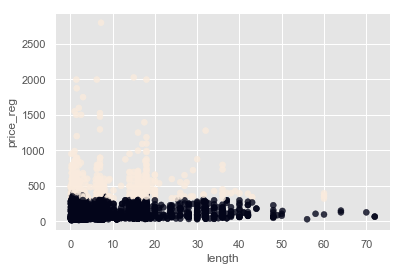

In [127]:
plt.scatter(X.loc[:, 'length'], X.loc[:, 'price_reg'], c=kmeans.labels_, alpha=0.8)
#plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 1], marker="+", s=1000, c=[0, 1, 2])
plt.xlabel('length')
plt.ylabel('price_reg')
plt.show()

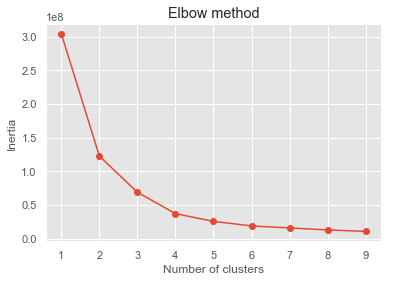

In [138]:
from PlottingFunctions import plot_inertia, plot_silhouette
plot_inertia(kmeans, X, range(1, 10))

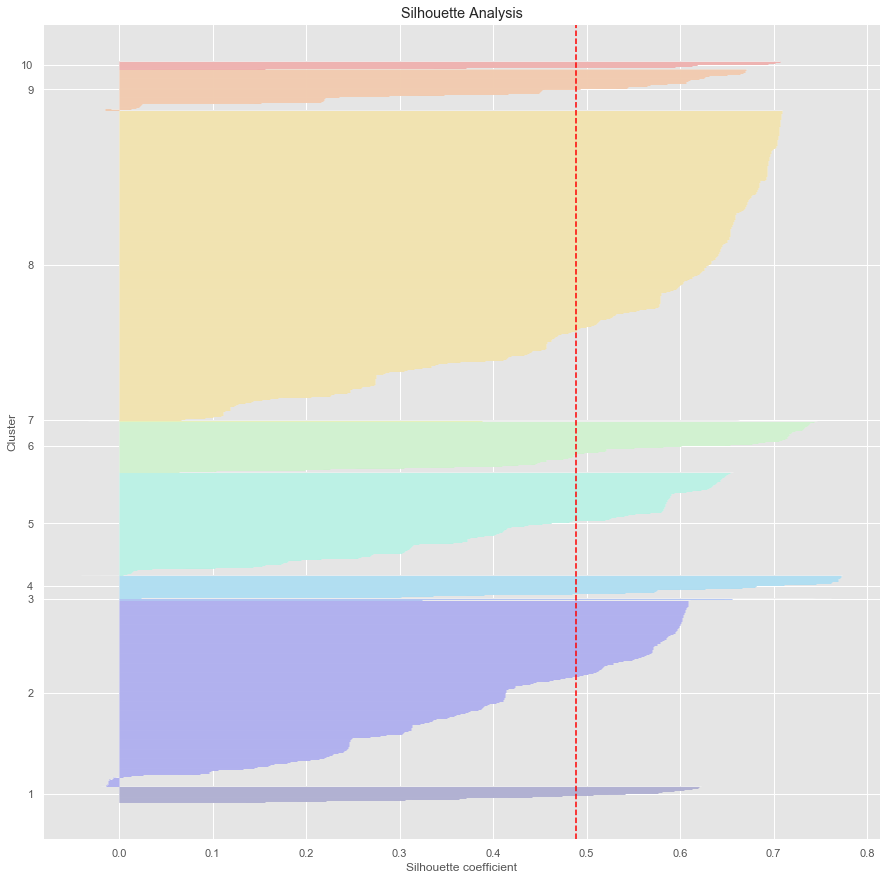

In [146]:
plt.figure(figsize=(15,15))

kmeans.set_params(n_clusters=10)
plot_silhouette(kmeans, X)

In [157]:
from sklearn.decomposition import PCA
pca = PCA()
X2 = pca.set_params(n_components=5).fit_transform(X)

In [158]:
kmeans.fit(X2)
labels = kmeans.labels_
labels

array([8, 8, 2, ..., 0, 0, 0])

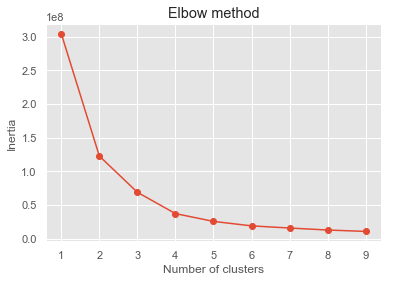

In [160]:
plot_inertia(kmeans, X2, range(1, 10))

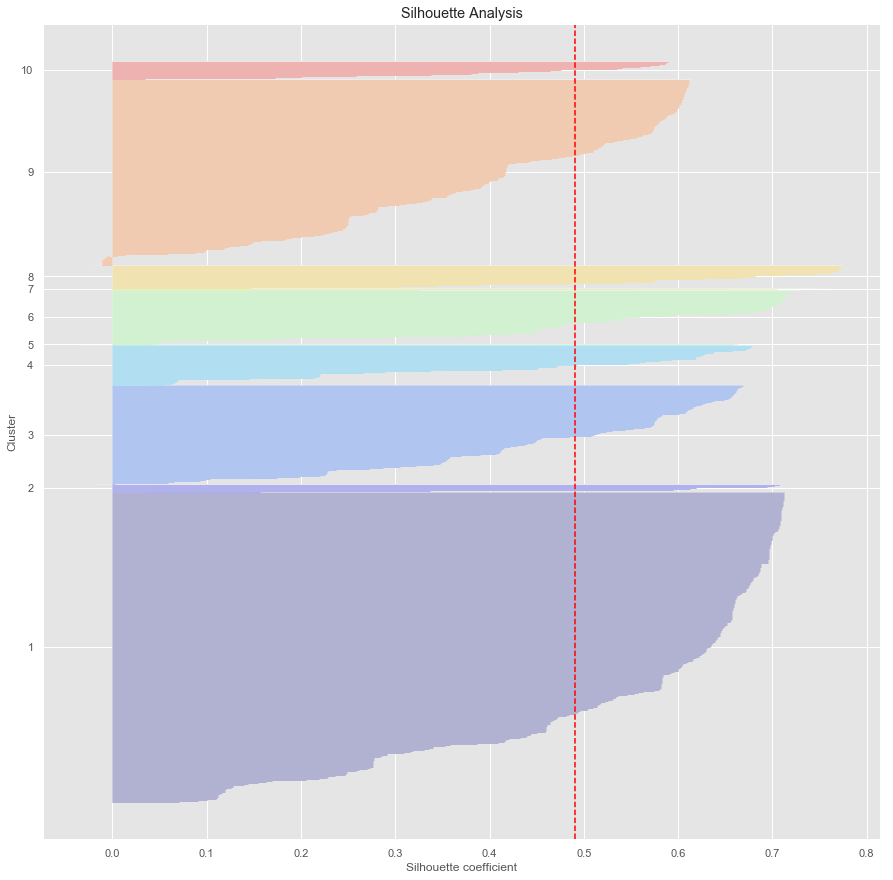

In [165]:
plt.figure(figsize=(15,15))

kmeans.set_params(n_clusters=10)
plot_silhouette(kmeans, X2)

### Hierarchical Clustering

In [147]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

In [148]:
hier.set_params(n_clusters=3)
hier.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x000002218A75C9D8>)

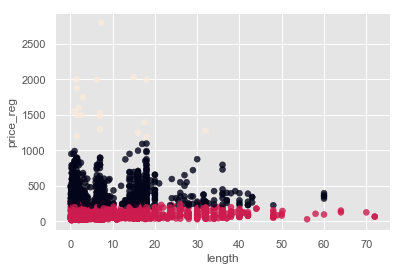

In [149]:
plt.scatter(X.loc[:, 'length'], X.loc[:, 'price_reg'], c=hier.labels_, alpha=0.8)
#plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 1], marker="+", s=1000, c=[0, 1, 2])
plt.xlabel('length')
plt.ylabel('price_reg')
plt.show()

In [150]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

In [152]:
linkage_df = pd.DataFrame(X, columns=X.columns)
linkage_df.head()

,price_dis,price_reg,price_range,discount,length,gold_quality,diamonds_ct,currcolor_black,currcolor_blue,currcolor_brown,currcolor_clear,currcolor_gold,currcolor_green,currcolor_grey,currcolor_multi,currcolor_orange,currcolor_pink,currcolor_purple,currcolor_red,currcolor_rose,currcolor_silver,currcolor_silver.,currcolor_white,currcolor_yellow,category_anklet,category_bracelets,category_cufflink,category_earrings,category_necklaces,category_pin,category_rings,sub_category_anklet,sub_category_band,sub_category_bangle & cuff,sub_category_beaded,sub_category_chain,sub_category_charm,sub_category_choker,sub_category_climber & cuff,sub_category_clip on,sub_category_cocktail & statement,sub_category_drop & chandelier,sub_category_hoop,sub_category_jacket,sub_category_lariat,sub_category_link,sub_category_pendant,sub_category_stackables & sets,sub_category_stud,sub_category_tennis,sub_category_unknown,sub_category_wrap,shape_baguette,shape_bib,shape_box,shape_button,shape_chandelier,shape_channel,shape_choker,shape_collar,shape_colored,shape_conch,shape_curve,shape_cushion,shape_drop,shape_emerald,shape_flag,shape_floral,shape_heart,shape_helix,shape_layer,shape_layered,shape_lobe,shape_marquise,shape_miracle,shape_moon,shape_nautical,shape_omega,shape_oval,shape_pave,shape_pear,shape_princess,shape_prong,shape_rectangular,shape_rope,shape_round,shape_set,shape_snake,shape_sports,shape_square,shape_star,shape_strand,shape_stretch,shape_sun,shape_teardrop,shape_thread,shape_trillion,shape_unknown,shape_wrap,main_material_beads,main_material_fabric,main_material_leather,main_material_metal,main_material_plastic,main_material_rose gold,main_material_silver,main_material_stainless steel,main_material_white gold,main_material_yellow gold,main_gem_agate,main_gem_amethyst,main_gem_crystal,main_gem_cubic zirconia,main_gem_diamond,main_gem_glass,main_gem_labradorite,main_gem_lapis,main_gem_moonstone,main_gem_mother-of-pearl,main_gem_onyx,main_gem_opal,main_gem_pearl,main_gem_pyrite,main_gem_turquoise,brand_ADORE,brand_ALOR,brand_AQUA,brand_Adina Reyter,brand_Alex Woo,brand_Alex and Ani,brand_Alexandra Koumba,brand_Alexis Bittar,brand_Area Stars,brand_Argento Vivo,brand_Atelier Swarovski,brand_BAUBLEBAR,brand_Bing Bang NYC,brand_Bloomingdale's,brand_Carolee,brand_Carolee Lux,brand_Chan Luu,brand_Crislu,brand_Dana Kellin,brand_Dana Rebecca Designs,brand_Dannijo,brand_Dodo,brand_Dogeared,brand_Ela Rae,brand_For Love & Lemons,brand_Freida Rothman,brand_Gorjana,brand_ICONERY,brand_Jane Basch,brand_Jennifer Zeuner,brand_Jet Set Candy,brand_Jules Smith,brand_KC Designs,brand_Kendra Scott,brand_Lauren Ralph Lauren,brand_Les Georgettes,brand_Links of London,brand_Lulu DK,brand_MATEO,brand_Majorica,brand_Marchesa,brand_Margaret Elizabeth,brand_Melissa Lovy,brand_Michael Kors,brand_Moon & Meadow,brand_Nadri,brand_Officina Bernardi,brand_Olivia Burton,brand_Oscar de la Renta,brand_PANDORA,brand_Phyllis and Rosie,brand_RJ Graziano,brand_Ralph Lauren,brand_Rebecca Minkoff,brand_Robert Lee Morris Soho,brand_Roberto Demeglio,brand_Rosefield,brand_Shinola,brand_Sorrelli,brand_Stephanie Kantis,brand_Swarovski,brand_TOUS,brand_Tory Burch,brand_Trina Turk,brand_Uno de 50,brand_Volu,brand_Weekend Max Mara,brand_ZoA Chicco,brand_kate spade new york,dis_rate
0,120.000000,120.000000,3,0,2.250000,18.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1,130.000000,130.000000,3,0,1.250000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [153]:
linkage_df2 = linkage_frame(linkage_df.values)
linkage_df2.head()

,row label 1,row label 2,distance,no. items in clust.
cluster 1,3792.000000,4044.000000,0.000000,2.000000
cluster 2,2966.000000,2968.000000,0.000000,2.000000
cluster 3,32.000000,4463.000000,0.000000,2.000000
cluster 4,3097.000000,3098.000000,0.000000,2.000000
cluster 5,220.000000,365.000000,0.000000,2.000000


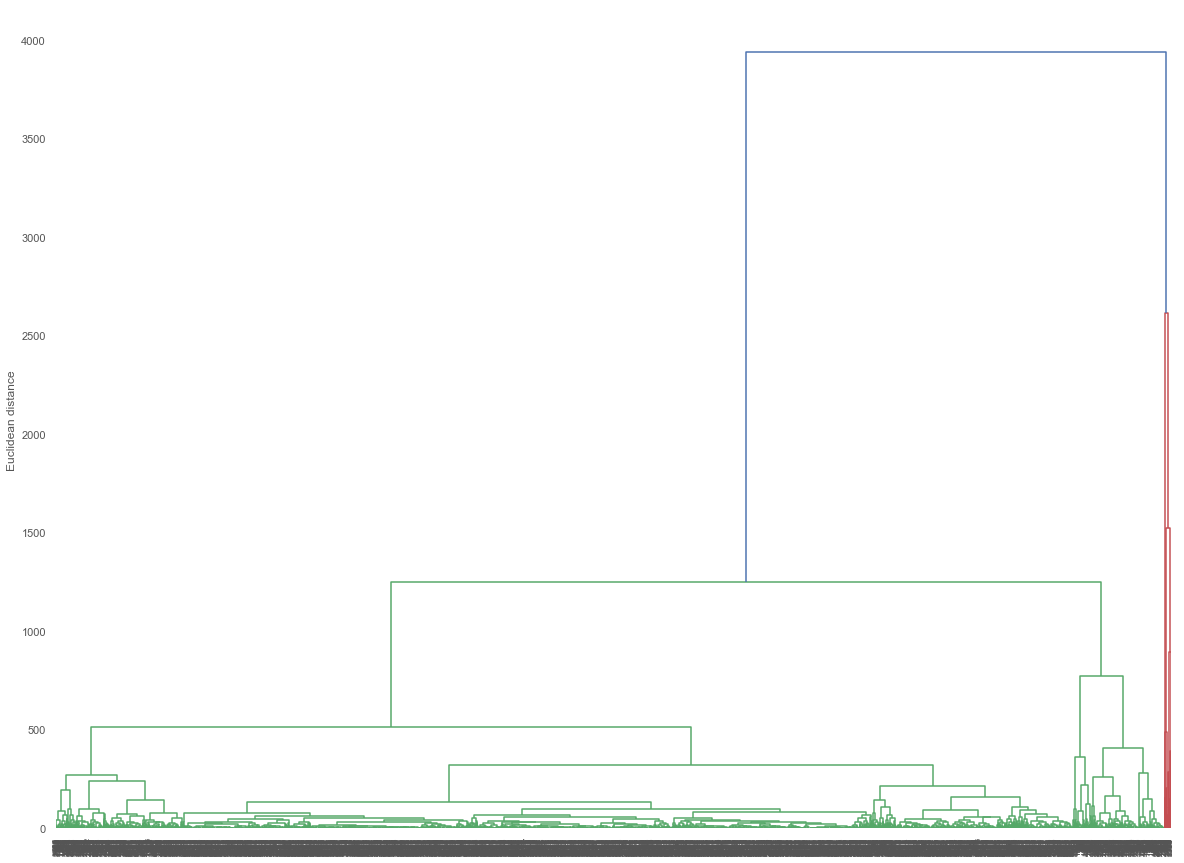

In [156]:
plt.figure(figsize=(20,15))
row_dendr = dendrogram(linkage_df2, leaf_rotation=90, leaf_font_size=8)
#plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

## 4. NLP

###  Topic modeling

In [32]:
import pickle as pk
from scipy import sparse as sp

In [148]:
dt2 = pd.read_csv('newdata_Sep23.csv', encoding = "ISO-8859-1")
print(dt2.shape)
dt2.head(1)

(4526, 35)


,Unnamed: 0,Unnamed: 0.1,popular,page_num,product_num,prod_name,brand,curr_color,price_dis,price_reg,price_range,discount,color_by_price,para_desc,desc_list,total_list,related_search,full_file_name,prod_image,category,sub_category,show_3,desc_list_old,shape,length,sizes,main_material,main_gem,gold_quality,color_list,diamonds_ct,width,diameter,inner_circumference,drop
0,0,2543,0,24,76,"""moon"" bead tricolor medium hoop earrings",Officina Bernardi,Multi,120.000000,120.000000,2.000000,0.000000,{'$120.00': ['Multi']},"Set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from Officina Bernardi.","set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from officina bernardi.2.25"" diameter,18k rose gold plated/18k gold plated/rhodium plated/sterling silver,post back,photo may have been enlarged and/or enhanced,made in italy,web id: 544545","set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from officina bernardi.2.25"" diameter,18k rose gold plated/18k gold plated/rhodium plated/sterling silver,post back,photo may have been enlarged and/or enhanced,made in italy,web id: 544545""moon"" bead tricolor medium hoop earrings","Moon Earrings,Officina Bernardi,Platinum Earrings,Rose Gold Hoop Earrings,Sterling Silver Hoop Earrings,Sterling Silver Hoops",img9877574_fpx_tif,https://images.bloomingdalesassets.com/is/image/BLM/products/4/optimized/9877574_fpx.tif,Earrings,Hoop,1,"2.25"" diameter,18K rose gold plated/18K gold plated/rhodium plated/sterling silver,Post back,Photo may have been enlarged and/or enhanced,Made in Italy,Web ID: 544545","['set', 'moon']",['unknown'],['medium'],beads,unknown,18k,"gold, rose gold, silver, sterling silver",0,0,2.25,0.000000,0.000000


In [149]:
dt2.para_desc.loc[dt2.para_desc.isna() == True] = ""
#dt.total_list = dt.prod_name + " " + dt.desc_list + " " + dt.para_desc
dt2.total_list = dt2.para_desc + " " + dt2.desc_list
dt2.total_list = dt2.total_list.map(lambda x: x.lower())
dt2.total_list.head()

0            set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from officina bernardi. set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from officina bernardi.2.25" diameter,18k rose gold plated/18k gold plated/rhodium plated/sterling silver,post back,photo may have been enlarged and/or enhanced,made in italy,web id: 544545
1    bring luxe shine to your look with these laser cut, platinum plated sterling silver hoop earrings from officina bernardi. bring luxe shine to your look with these laser cut, platinum plated sterling silver hoop earrings from officina bernardi.1.25" diameter,post back,platinum plated sterling silver. imported,photo may have been enlarged and/or enhanced,web id: 544539
2                                                                                                                                          0.6"l,diamonds: 0.05 ct. t.w.; color/clarity: si1si2,sterling silver/genuine diamond,all gemstone carat weights

In [150]:
docs = dt2.total_list
docs.sample(5)

3877                                                                                                                                                                                                                                                                                                                                                                                            sterling silver,1.05"l,photo may have been enlarged and/or enhanced.,imported,web id: 2178021
1243    personalize alex and ani's delicate layerable with any charm from the chain station collection. the effortless design allows wearers to customize the necklace to their heart's content. personalize alex and ani's delicate layerable with any charm from the chain station collection. the effortless design allows wearers to customize the necklace to their heart's content.this necklace can be customized with alex and ani necklace charms (sold separately).,web id: 1760439
4156                 take on the season's or

In [151]:
docs[0]

'set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from officina bernardi. set your look to dazzle with these luxe, tricolor laser-cut hoop earrings from officina bernardi.2.25" diameter,18k rose gold plated/18k gold plated/rhodium plated/sterling silver,post back,photo may have been enlarged and/or enhanced,made in italy,web id: 544545'

In [154]:
re.sub(r"this\D*|\d*bloomingdale\D*|\d*collection,", "", docs[50])

TypeError: expected string or bytes-like object

In [152]:
# Pre-process and vectorize the documents¶
from nltk.tokenize import RegexpTokenizer

def remove_unnecessary_sentence(s):
    val = re.sub('photo may have been enlarged and/or enhanced,', "", s)
    val = re.sub(r"photo\D*enlarged\D*,", "", s)
    val = re.sub("this item is part of our 100% bloomingdale's collection,", "", val)
    val = re.sub(r"this\D*|\d*bloomingdale\D*|\d*collection,", "", s)
    val = re.sub(r',\s*web id:\s*\d+', "", val)
    
    return val

def preprocessDoc(docs):
    docs = np.array(docs)
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        #docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    docs = [[token for token in doc if not token.isdigit()] for doc in docs]  #remove numbers
    docs = [[token for token in doc if len(token) > 3] for doc in docs] #remove words that are short 

    return docs

In [153]:
docs = docs.map(lambda x: remove_unnecessary_sentence(x))
docs = preprocessDoc(docs)

In [155]:
from gensim.corpora import Dictionary
from gensim.models import Phrases
bigram = Phrases(docs, min_count=10, threshold=10)  # only ones that appear 10 times or more.
trigram = Phrases(bigram[docs])

for i in range(len(docs)):
    for token in bigram[docs[i]]:
        if '_' in token:
            docs[i].append(token)
#            print ("bi:", token)
    for token in trigram[docs[i]]:
        if token.count('_') > 2 :
            docs[i].append(token)
#            print ("tri:", token)

dictionary_ = Dictionary(docs)
print (len(dictionary_))
dictionary_.filter_extremes(no_below=10, no_above=0.2)
print (len(dictionary_))

2319
419


In [156]:
corpus = [dictionary_.doc2bow(doc) for doc in docs]
print('unique tokens: %d' % len(dictionary_)) #gensim.corpora.dictionary.Dictionary
print('Number of records: %d' % len(corpus)) #List

unique tokens: 419
Number of records: 4526


In [100]:
dictionary_.

SyntaxError: invalid syntax (<ipython-input-100-5aa2e3f7480b>, line 1)

In [142]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 5
chunksize = 500 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 400
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
dictionary_[0]  # This is only to "load" the dictionary. Otherwise, you will get the value error. 
id2word = dictionary_.id2token

model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, alpha='auto', eta='auto', iterations=iterations, num_topics=num_topics, passes=passes, eval_every=eval_every)

In [143]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [144]:
pyLDAvis.gensim.prepare(model, corpus, dictionary_)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1      0.161989 -0.231984       1        1 30.602655
4      0.154507  0.355852       2        1 22.190069
0     -0.290149  0.035725       3        1 19.648930
3     -0.292311 -0.063426       4        1 15.677144
2      0.265964 -0.096168       5        1 11.881204, topic_info=     Category        Freq                                           Term       Total   loglift   logprob
term                                                                                                    
249   Default 1094.000000                                          brass 1094.000000 30.000000 30.000000
300   Default  579.000000                                      swarovski  579.000000 29.000000 29.000000
56    Default  752.000000                                          style  752.000000 28.000000 28.000000
37    Default  836.000000                                        lobster  836.000000 27.000000 27.000000
38    Default  825.000000                                  lobster_clasp  825.000000 26.000000 26.000000
259   Default  788.000000                                          metal  788.000000 25.000000 25.000000
35    Default  906.000000                                          clasp  906.000000 24.000000 24.000000
14    Default  546.000000                                           your  546.000000 23.000000 23.000000
10    Default  497.000000                                        rhodium  497.000000 22.000000 22.000000
99    Default  367.000000                                           ring  367.000000 21.000000 21.000000
57    Default  477.000000                                           shop  477.000000 20.000000 20.000000
86    Default  328.000000                                         spring  328.000000 19.000000 19.000000
36    Default  711.000000                                      extension  711.000000 18.000000 18.000000
101   Default  313.000000                                    spring_ring  313.000000 17.000000 17.000000
43    Default  709.000000                                 with_extension  709.000000 16.000000 16.000000
256   Default  627.000000                                          glass  627.000000 15.000000 15.000000
84    Default  581.000000                                        pendant  581.000000 14.000000 14.000000
11    Default  566.000000                                           rose  566.000000 13.000000 13.000000
40    Default  258.000000                                      simulated  258.000000 12.000000 12.000000
39    Default  289.000000                                         pearls  289.000000 11.000000 11.000000
1     Default  611.000000                                       diameter  611.000000 10.000000 10.000000
245   Default  264.000000                                       crystals  264.000000  9.000000  9.000000
13    Default 1320.000000                                           with 1320.000000  8.000000  8.000000
314   Default  256.000000                             swarovski_crystals  256.000000  7.000000  7.000000
47    Default  297.000000                                        organic  297.000000  6.000000  6.000000
301   Default  230.000000                              swarovski_crystal  230.000000  5.000000  5.000000
2     Default  275.000000                                       earrings  275.000000  4.000000  4.000000
67    Default  190.000000                                     adjustable  190.000000  3.000000  3.000000
55    Default  351.000000                                        crystal  351.000000  2.000000  2.000000
168   Default  374.000000                                          pearl  374.000000  1.000000  1.000000
37     Topic1  836.126953                                        lobster  836.328918  1.183800 -2.650000
38     Topic1  825.183533                                  lobster_clasp  825.385376  1.183800 -2.663200
259    Topic1  7

In [145]:
def explore_topic(lda_model, topic_number, topn, output=True):
    terms = []
    for term, frequency in lda_model.show_topic(topic_number, topn=topn):
        terms += [term]
        if output:
            print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))   
    return terms

In [146]:
print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')
for i in range(num_topics):
    print('Topic '+str(i)+' |---------------------\n')
    tmp = explore_topic(model,topic_number=i, topn=10, output=True )

term                 frequency

Topic 0 |---------------------

style                0.091
brass                0.082
rhodium              0.065
shop                 0.063
glass                0.059
diameter             0.059
rose                 0.054
drop                 0.044
backs                0.040
circumference        0.032
Topic 1 |---------------------

clasp                0.074
lobster              0.071
lobster_clasp        0.070
metal                0.067
with                 0.047
with_extension       0.044
extension            0.044
drop                 0.031
pendant              0.031
diamonds             0.021
Topic 2 |---------------------

ring                 0.080
spring               0.071
spring_ring          0.068
simulated            0.056
with                 0.054
pendant              0.048
adjustable           0.041
extension            0.040
with_extension       0.040
simulated_pearls     0.032
Topic 3 |---------------------

swarovski            0.096
bra

In [172]:
X = array([ 0.02830593,  0.18184023,  0.25696842,  0.50545337,  0.65037424, 0.66610167,  0.75013629,  0.85223307,  0.87860147,  0.98789545])
Y = array([ 1.11504331,  1.13034499,  1.09484554,  1.18813604,  1.40573289, 1.37469512,  1.43253012,  1.3159494 ,  1.33982505,  1.62849967])

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ols = linear_model.LinearRegression()
##Your code here

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ols.fit(X_train.reshape(-1,1), y_train)
y_pred = ols.predict(X_test)
MSE = mean_squared_error(y_test.reshape(-1,1), y_pred)

print(ols.coef_)
print(r2_score(y_test, y_pred))

NameError: name 'array' is not defined